# Install Dependecies and Setup 

In [1]:
import numpy as np
import cv2  # OpenCV
import sklearn  # Scikit-Learn
import matplotlib.pyplot as plt
import pandas as pd
import os

# Load Dataset 

In [2]:
dataset_path = 'face_dataset/lfw-deepfunneled'

# Initialize a list to store the image data and labels
images = []
labels = []


# Walk through the directory to list all the subdirectories and files
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".jpg") or file.endswith(".png"):
            
            # Construct the full path to the image file
            image_path = os.path.join(root, file)
            
            # Load the image in grayscale 
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            
            # Append the image and its label
            images.append(image)
            labels.append(root.split(os.sep)[-1])  # The label is the folder name
            

# Convert the lists to NumPy arrays if needed
images_np = np.array(images)
labels_np = np.array(labels)


print(labels[1])
(images[1])

Stefano_Gabbana


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [3]:
import matplotlib.pyplot as plt
import random

# Function to display images
def show_images(images, labels, num_images=5):
    
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        
        # Pick a random index for sampling images
        
        idx = random.randint(0, len(images) - 1)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[idx], cmap='gray')  # Show the image in grayscale
        plt.title(labels[idx])  # The title is the label of the image
        plt.axis('off')  # Turn off the axis
    plt.show()

# Image Preprocessing 

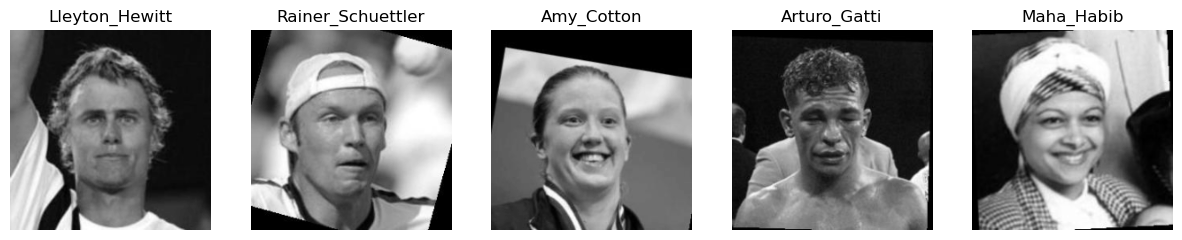

In [4]:
def preprocess_image(image_array):
    # Resize the image to 224x224 pixels
    resized_image = cv2.resize(image_array, (224, 224))  # Using OpenCV for resizing
    
    # Normalize the image
    normalized_image = resized_image / 255.0
    
    return normalized_image

# Preprocess all images
preprocessed_images = [preprocess_image(img) for img in images]
# print(len(preprocessed_images))

# If you want to visualize the preprocessed images
show_images(preprocessed_images, labels)


# Split the data 

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming you have your data (images and labels) stored in `images_np` and `labels_np` NumPy arrays

# Define the ratios for splitting (e.g., 70% training, 15% validation, 15% test)
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(images_np, labels_np, test_size=(1 - train_ratio), random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_ratio / (test_ratio + val_ratio), random_state=42)

# Check the sizes of the resulting sets
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))



Training set size: 9263
Validation set size: 1985
Test set size: 1985


Training Dataset


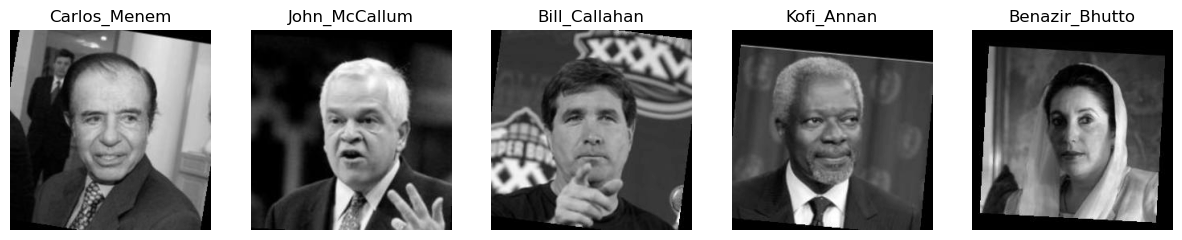

Validation Dataset


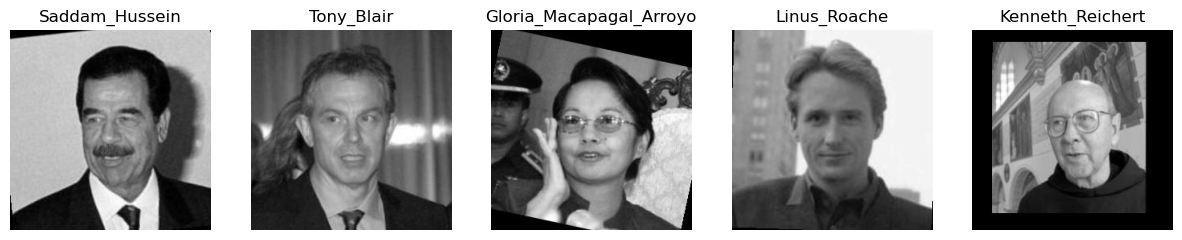

Test Dataset


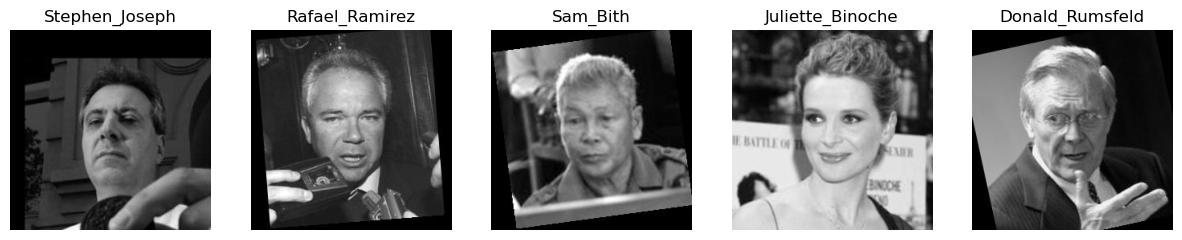

In [6]:
# Show random images from the training set
print("Training Dataset")
show_images(X_train, y_train, num_images=5)

# Show random images from the validation set
print("Validation Dataset")
show_images(X_val, y_val, num_images=5)

# Show random images from the test set
print("Test Dataset")
show_images(X_test, y_test, num_images=5)

In [7]:
image_shape = images_np.shape

# Print the shape to confirm if it's a 2D array
print("Shape of images_np:", image_shape)

kernel = np.array([[1, 0, -1],
                       [1, 0, -1],
                       [1, 0, -1]], dtype=np.float32)
kernel.shape

Shape of images_np: (13233, 250, 250)


(3, 3)

# CNN model 

In [8]:
import numpy as np

def convolution2d(image, kernel):
    """
    Perform 2D convolution between an image and a kernel.
    
    Args:
    image (numpy.ndarray): Input grayscale image (height x width).
    kernel (numpy.ndarray): Convolution kernel (k_height x k_width).
    
    Returns:
    numpy.ndarray: Convolved image.
    """
    if len(image.shape) != 2 or len(kernel.shape) != 2:
        raise ValueError("Both image and kernel should be 2D arrays.")
    
    h, w = image.shape
    k_h, k_w = kernel.shape
    pad_h, pad_w = k_h // 2, k_w // 2  # Padding to maintain output size
    
    # Initialize the output image
    output = np.zeros((h, w))
    
    # Perform convolution
    for i in range(pad_h, h - pad_h):
        for j in range(pad_w, w - pad_w):
            region = image[i - pad_h: i + pad_h + 1,   j - pad_w:  j + pad_w + 1]
            output[i, j] = np.sum(region * kernel)
    
    return output

def relu(x):
    """
    ReLU activation function.
    
    Args:
    x (numpy.ndarray): Input array.
    
    Returns:
    numpy.ndarray: Output array after applying ReLU.
    """
    return np.maximum(0, x)

def max_pooling2d(image, pool_size=(2, 2)):
    """
    Perform 2D max pooling on an image.
    
    Args:
    image (numpy.ndarray): Input grayscale image (height x width).
    pool_size (tuple): Pooling window size (p_height x p_width).
    
    Returns:
    numpy.ndarray: Pooled image.
    """
    if len(image.shape) != 2:
        raise ValueError("Input image should be a 2D array.")
    
    p_h, p_w = pool_size
    h, w = image.shape
    pooled_h = h // p_h
    pooled_w = w // p_w
    
    # Initialize the pooled image
    pooled_image = np.zeros((pooled_h, pooled_w))
    
    # Perform max pooling
    for i in range(pooled_h):
        for j in range(pooled_w):
            break
    
    return pooled_image

# Example usage:
if __name__ == "__main__":
    # Create a simple grayscale image (8x8) and a kernel (3x3)
    image = np.array([[1, 2, 3, 4, 5, 6, 7, 8],
                      [8, 7, 6, 5, 4, 3, 2, 1],
                      [1, 2, 3, 4, 5, 6, 7, 8],
                      [8, 7, 6, 5, 4, 3, 2, 1],
                      [1, 2, 3, 4, 5, 6, 7, 8],
                      [8, 7, 6, 5, 4, 3, 2, 1],
                      [1, 2, 3, 4, 5, 6, 7, 8],
                      [8, 7, 6, 5, 4, 3, 2, 1]], dtype=np.float32)
    
    kernel = np.array([[1, 0, -1],
                       [1, 0, -1],
                       [1, 0, -1]], dtype=np.float32)
    
    # Perform convolution
    convolved_image = convolution2d(image, kernel)
    
    # Apply ReLU activation
    activated_image = relu(convolved_image)
    
    # Perform max pooling
    pooled_image = max_pooling2d(activated_image, pool_size=(2, 2))
    
    print("Original Image:")
    print(image)
    print("\nConvolved Image:")
    print(convolved_image)
    print("\nActivated Image (ReLU):")
    print(activated_image)
    print("\nPooled Image:")
    print(pooled_image)


Original Image:
[[1. 2. 3. 4. 5. 6. 7. 8.]
 [8. 7. 6. 5. 4. 3. 2. 1.]
 [1. 2. 3. 4. 5. 6. 7. 8.]
 [8. 7. 6. 5. 4. 3. 2. 1.]
 [1. 2. 3. 4. 5. 6. 7. 8.]
 [8. 7. 6. 5. 4. 3. 2. 1.]
 [1. 2. 3. 4. 5. 6. 7. 8.]
 [8. 7. 6. 5. 4. 3. 2. 1.]]

Convolved Image:
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -2. -2. -2. -2. -2. -2.  0.]
 [ 0.  2.  2.  2.  2.  2.  2.  0.]
 [ 0. -2. -2. -2. -2. -2. -2.  0.]
 [ 0.  2.  2.  2.  2.  2.  2.  0.]
 [ 0. -2. -2. -2. -2. -2. -2.  0.]
 [ 0.  2.  2.  2.  2.  2.  2.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]

Activated Image (ReLU):
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 2. 2. 2. 2. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 2. 2. 2. 2. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 2. 2. 2. 2. 2. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]

Pooled Image:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
